In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

In [2]:
today = date.today()
print("Today's date:", today)
date_today = str(today)
date_today

Today's date: 2022-06-02


'2022-06-02'

In [3]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

taxol = '[Taxol] ' r'$(\mu M)$'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

In [4]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
snsblue = '#225b91'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette = [grey,cyan] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green]
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


## Import Kappa csv ##

In [61]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [62]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] == 'final.csv') == True]
files

[WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-02-28_DCX-HUGS-WT_freshtaxol/CH1_DCXGFP1.0nM_typeWT_40P-yes/1_Composite_final.csv'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-02-28_DCX-HUGS-WT_freshtaxol/CH1_DCXGFP1.0nM_typeWT_40P-yes/2_Composite_final.csv'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-02-28_DCX-HUGS-WT_freshtaxol/CH1_DCXGFP1.0nM_typeWT_40P-yes/3_Composite_final.csv'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-02-28_DCX-HUGS-WT_freshtaxol/CH1_DCXGFP1.0nM_typeWT_40P-yes/4_Composite_final.csv'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-02-28_DCX-HUGS-WT_freshtaxol/CH1_DCXGFP1.0nM_typeWT_40P-yes/5_Composite_final.csv'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-02-28_DCX-HUGS-WT_freshtaxol/CH1_DCXGFP1.0nM_typeWT_40P-yes/6_Composite_final.csv')]

In [63]:
i = files[0]
dateloc = str(i).rfind("202")   
dates = str(i)[dateloc : dateloc+10]

CHlocstart = str(i).find("CH") 
CHlocend = str(i).find('_', CHlocstart)
CH = str(i)[CHlocstart+2: CHlocend]

DCXGFPstart = str(i).find('DCXGFP')
DCXGFPend = str(i).find('nM',DCXGFPstart)
DCXGFP = str(i)[DCXGFPstart+6: DCXGFPend]


dates,CH,DCXGFP

('2022-02-28', '1', '1.0')

In [64]:
roll = 5

joindata = pd.DataFrame(columns=[] , index=[])
for i in files:
    data0 = pd.read_csv(i, encoding='utf-8')
    
    for j in data0['Curve Name'].unique():
        curvedata = data0[data0['Curve Name'] == j]
        array = curvedata['Red Intensity'].values
        curvedata['Normal Intensity'] =  (array - min(array)) / (max(array) - min(array))
        
        curvedata['Date'] = dates
        curvedata['CH'] = CH
        curvedata[DCXconc] = DCXGFP
        curvedata['Filename'] = i.stem
        
        joindata = joindata.append(curvedata, ignore_index=True)
    
joindata


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Curve Name,Curve Length (um),Average Curvature (um-1),Curvature Std (um-1),X-Coordinate (um),Y-Coordinate (um),Point Curvature (um-1),Point Curvature Sign,Red Intensity,Green Intensity,Blue Intensity,Normal Intensity,Date,CH,[DCX] $(n M)$,Filename
0,CURVE 1,21.492819,0.037069,0.027364,33.572043,15.898432,0.010862,-1,0.0,33.0,33.0,0.000000,2022-02-28,1,1.0,1_Composite_final
1,CURVE 1,21.492819,0.037069,0.027364,33.634781,15.945080,0.011113,-1,0.0,110.0,110.0,0.000000,2022-02-28,1,1.0,1_Composite_final
2,CURVE 1,21.492819,0.037069,0.027364,33.696895,15.991347,0.011371,-1,0.0,110.0,110.0,0.000000,2022-02-28,1,1.0,1_Composite_final
3,CURVE 1,21.492819,0.037069,0.027364,33.758388,16.037235,0.011634,-1,0.0,109.0,109.0,0.000000,2022-02-28,1,1.0,1_Composite_final
4,CURVE 1,21.492819,0.037069,0.027364,33.819264,16.082747,0.011904,-1,7.0,145.0,145.0,0.006692,2022-02-28,1,1.0,1_Composite_final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24955,CURVE 13,7.820820,0.070118,0.050320,24.251409,41.449027,0.013377,1,74.0,196.0,196.0,0.222892,2022-02-28,1,1.0,6_Composite_final
24956,CURVE 13,7.820820,0.070118,0.050320,24.289246,41.447501,0.013811,1,50.0,192.0,192.0,0.150602,2022-02-28,1,1.0,6_Composite_final
24957,CURVE 13,7.820820,0.070118,0.050320,24.327302,41.445947,0.014228,1,50.0,192.0,192.0,0.150602,2022-02-28,1,1.0,6_Composite_final
24958,CURVE 13,7.820820,0.070118,0.050320,24.365579,41.444362,0.014630,1,50.0,192.0,192.0,0.150602,2022-02-28,1,1.0,6_Composite_final


In [65]:
newdirectory = str(path.parents[1])+'//Curvature_Data_Sheets'
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)

In [66]:
joindata.to_csv(newmydir/(dates + '_jointdata-on_'+date_today +'.csv'), encoding='utf-8', index=False)
joindata.to_csv(path/(dates + '_jointdata-on_'+date_today +'.csv'), encoding='utf-8', index=False)

### Ratio ###

In [67]:
#askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = newmydir

In [68]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] != 'Sheet.csv') == True]
files = [i for i in files if str(i).rfind('csv') != -1 if str(i).rfind(date_today) != -1 if str(i).rfind('jointdata') != -1]

files

[WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/Curvature_Data_Sheets/2022-02-28_jointdata-on_2022-05-31.csv'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/Curvature_Data_Sheets/2022-03-01_jointdata-on_2022-05-31.csv')]

In [69]:
joindata = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    joindata = joindata.append(d, ignore_index=True)

joindata.to_csv(path/('jointdata-on_'+date_today +'_MasterSheet.csv'), encoding='utf-8', index=False)
joindata

,Curve Name,Curve Length (um),Average Curvature (um-1),Curvature Std (um-1),X-Coordinate (um),Y-Coordinate (um),Point Curvature (um-1),Point Curvature Sign,Red Intensity,Green Intensity,Blue Intensity,Normal Intensity,Date,CH,[DCX] $(n M)$,Filename
0,CURVE 1,21.492819,0.037069,0.027364,33.572043,15.898432,0.010862,-1,0.0,33.0,33.0,0.000000,2022-02-28,1,1.0,1_Composite_final
1,CURVE 1,21.492819,0.037069,0.027364,33.634781,15.945080,0.011113,-1,0.0,110.0,110.0,0.000000,2022-02-28,1,1.0,1_Composite_final
2,CURVE 1,21.492819,0.037069,0.027364,33.696895,15.991347,0.011371,-1,0.0,110.0,110.0,0.000000,2022-02-28,1,1.0,1_Composite_final
3,CURVE 1,21.492819,0.037069,0.027364,33.758388,16.037235,0.011634,-1,0.0,109.0,109.0,0.000000,2022-02-28,1,1.0,1_Composite_final
4,CURVE 1,21.492819,0.037069,0.027364,33.819264,16.082747,0.011904,-1,7.0,145.0,145.0,0.006692,2022-02-28,1,1.0,1_Composite_final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64763,CURVE 15,8.748654,0.026783,0.017434,45.405851,6.350519,0.061319,1,89.0,57.0,57.0,0.445000,2022-03-01,1,1.0,9_Composite-final
64764,CURVE 15,8.748654,0.026783,0.017434,45.467943,6.333301,0.062194,1,89.0,57.0,57.0,0.445000,2022-03-01,1,1.0,9_Composite-final
64765,CURVE 15,8.748654,0.026783,0.017434,45.529964,6.315835,0.063060,1,81.0,65.0,65.0,0.405000,2022-03-01,1,1.0,9_Composite-final
64766,CURVE 15,8.748654,0.026783,0.017434,45.591914,6.298116,0.063918,1,70.0,75.0,75.0,0.350000,2022-03-01,1,1.0,9_Composite-final


### If data already joint ###

In [5]:
askfile = filedialog.askopenfilename()
joindata = pd.read_csv(askfile, encoding='utf-8')

In [6]:
path = Path(askfile).parents[0]
path

WindowsPath('C:/Users/Brouhard Lab/OneDrive/Documentos/2022_1winter/Curvature_Data_Sheets')

In [7]:
alldata = joindata[['Point Curvature (um-1)','Red Intensity','Green Intensity','Date','Filename','Curve Name']]
alldata.groupby(['Date', 'Filename'])["Red Intensity"].min()

Date        Filename         
2022-02-28  1_Composite_final    0.0
            2_Composite_final    0.0
            3_Composite_final    0.0
            4_Composite_final    0.0
            5_Composite_final    0.0
            6_Composite_final    0.0
2022-03-01  3_Composite-final    0.0
            4_Composite-final    0.0
            5_Composite-final    0.0
            6_Composite-final    0.0
            7_Composite-final    0.0
            8_Composite-final    0.0
            9_Composite-final    0.0
Name: Red Intensity, dtype: float64

In [8]:
maxcurve = alldata.groupby(['Date', 'Filename'])["Point Curvature (um-1)"].max()
#maxcurve.to_csv(path/('maxcurvedata-on_'+date_today +'.csv'), encoding='utf-8', index=False)

In [9]:
maxcurve

Date        Filename         
2022-02-28  1_Composite_final    0.747068
            2_Composite_final    1.285791
            3_Composite_final    1.162652
            4_Composite_final    1.370980
            5_Composite_final    1.121477
            6_Composite_final    1.327856
2022-03-01  3_Composite-final    1.464221
            4_Composite-final    1.088242
            5_Composite-final    0.623940
            6_Composite-final    0.964237
            7_Composite-final    1.002355
            8_Composite-final    1.014004
            9_Composite-final    1.441641
Name: Point Curvature (um-1), dtype: float64

In [10]:
def normal_int(df,channel):
    
    max_RFP = df.groupby(['Date', 'Filename'])[channel].max()
    min_RFP = df.groupby(['Date', 'Filename'])[channel].min()
    
    equal_int = pd.DataFrame(columns=[] , index=[])

    uniquedates = df['Date'].unique()
    for i in uniquedates:
        uniquefile =  df[df['Date'] == i]['Filename'].unique()

        for j in uniquefile:
            groupdf = df[(df['Date'] == i) & (df['Filename'] == j)]
            
            max_RFP_value = max_RFP[i,j]
            min_RFP_value = min_RFP[i,j]

            groupdf['Normalized DCX-GFP Intensity'] = (df[channel] - min_RFP_value) / (max_RFP_value -  min_RFP_value)
            
            equal_int = pd.concat([equal_int, groupdf])
    return equal_int

In [11]:
data = normal_int(alldata,"Red Intensity")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:

data = data.sort_values(by=['Point Curvature (um-1)'])

roll = 100

data['Rolling Intensity'] =  data['Normalized DCX-GFP Intensity'].rolling(roll, min_periods=1, center=True).mean()
data['Rolling Intensity std'] =  data['Normalized DCX-GFP Intensity'].rolling(roll, min_periods=1, center=True).std()

data

,Point Curvature (um-1),Red Intensity,Green Intensity,Date,Filename,Curve Name,Normalized DCX-GFP Intensity,Rolling Intensity,Rolling Intensity std
31728,4.213304e-07,107.0,93.0,2022-03-01,3_Composite-final,CURVE 11,0.072444,0.055014,0.093262
43579,2.510332e-06,32.0,167.0,2022-03-01,5_Composite-final,CURVE 9,0.024961,0.053936,0.092645
12637,2.613904e-06,1.0,94.0,2022-02-28,3_Composite_final,CURVE 7,0.001050,0.054683,0.091891
42555,8.853169e-06,378.0,140.0,2022-03-01,5_Composite-final,CURVE 5,0.294852,0.053652,0.091312
64214,9.052728e-06,14.0,99.0,2022-03-01,9_Composite-final,CURVE 11,0.012987,0.053160,0.090519
...,...,...,...,...,...,...,...,...,...
27351,1.463368e+00,321.0,77.0,2022-03-01,3_Composite-final,CURVE 1,0.217332,0.321886,0.155135
27355,1.463395e+00,321.0,77.0,2022-03-01,3_Composite-final,CURVE 1,0.217332,0.318983,0.155076
27352,1.464001e+00,321.0,77.0,2022-03-01,3_Composite-final,CURVE 1,0.217332,0.321591,0.155360
27354,1.464021e+00,321.0,77.0,2022-03-01,3_Composite-final,CURVE 1,0.217332,0.317737,0.154296


In [13]:
curve = joindata.groupby(['Filename'])['Curve Name'].unique()
curveN = 0

for i in curve:
    j = len(i)
    curveN += j
curveN

175

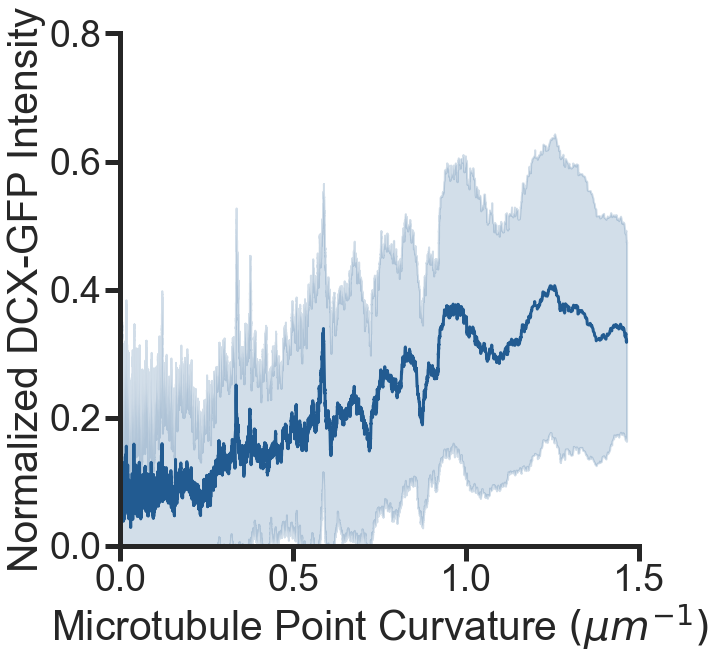

In [78]:
fig, ax = plt.subplots(1,1,figsize=(10.5,10))

x = data['Point Curvature (um-1)'].values
mean = data['Rolling Intensity'].values
std = data['Rolling Intensity std'].values

plt.plot(x, mean, color=snsblue)
plt.fill_between(x, mean - std, mean + std, color=snsblue, alpha=0.2)

ax.set_ylabel('Normalized DCX-GFP Intensity')
ax.set_xlabel('Microtubule Point Curvature ' r'$(\mu m ^{-1})$')
ax.set_xlim(0,1.5)
ax.set_ylim(0,0.8)

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

plt.savefig(path/('curvature_dcx_'+date_today+'.svg'))

In [79]:
dataT = normal_int(alldata,"Green Intensity")

dataT = dataT.sort_values(by=['Point Curvature (um-1)'])

roll = 100

dataT['Rolling Intensity'] =  dataT['Normalized DCX-GFP Intensity'].rolling(roll, min_periods=1, center=True).mean()
dataT['Rolling Intensity std'] =  dataT['Normalized DCX-GFP Intensity'].rolling(roll, min_periods=1, center=True).std()

dataT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Point Curvature (um-1),Red Intensity,Green Intensity,Date,Filename,Curve Name,Normalized DCX-GFP Intensity,Rolling Intensity,Rolling Intensity std
31728,4.213304e-07,107.0,93.0,2022-03-01,3_Composite-final,CURVE 11,0.341912,0.327513,0.157886
43579,2.510332e-06,32.0,167.0,2022-03-01,5_Composite-final,CURVE 9,0.549342,0.326028,0.156659
12637,2.613904e-06,1.0,94.0,2022-02-28,3_Composite_final,CURVE 7,0.276471,0.332361,0.161699
42555,8.853169e-06,378.0,140.0,2022-03-01,5_Composite-final,CURVE 5,0.460526,0.333743,0.160452
64214,9.052728e-06,14.0,99.0,2022-03-01,9_Composite-final,CURVE 11,0.342657,0.335188,0.159286
...,...,...,...,...,...,...,...,...,...
27351,1.463368e+00,321.0,77.0,2022-03-01,3_Composite-final,CURVE 1,0.283088,0.371266,0.176301
27355,1.463395e+00,321.0,77.0,2022-03-01,3_Composite-final,CURVE 1,0.283088,0.363378,0.167875
27352,1.464001e+00,321.0,77.0,2022-03-01,3_Composite-final,CURVE 1,0.283088,0.364962,0.169074
27354,1.464021e+00,321.0,77.0,2022-03-01,3_Composite-final,CURVE 1,0.283088,0.364981,0.170723


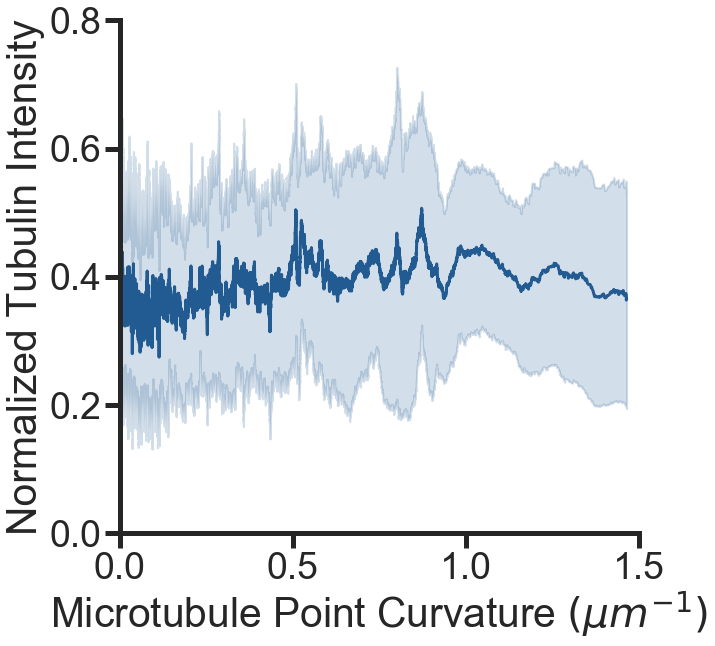

In [80]:
fig, ax = plt.subplots(1,1,figsize=(10.5,10))

x = dataT['Point Curvature (um-1)'].values
mean = dataT['Rolling Intensity'].values
std = dataT['Rolling Intensity std'].values

plt.plot(x, mean, color=snsblue)
plt.fill_between(x, mean - std, mean + std, color=snsblue, alpha=0.2)

ax.set_ylabel('Normalized Tubulin Intensity')
ax.set_xlabel('Microtubule Point Curvature ' r'$(\mu m ^{-1})$')
ax.set_xlim(0,1.5)
ax.set_ylim(0,0.8)

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

plt.savefig(path/('curvature_tub_'+date_today+'.svg'))

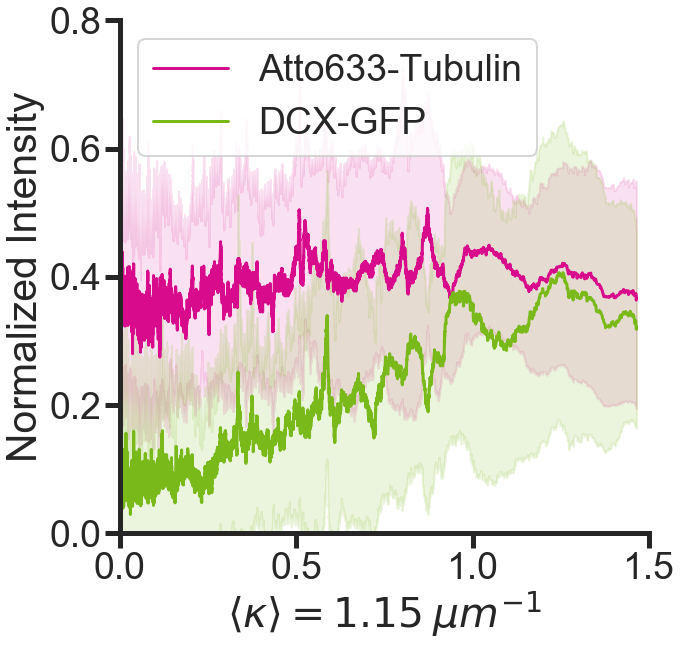

In [95]:
fig, ax = plt.subplots(1,1,figsize=(10.5,10))

x = dataT['Point Curvature (um-1)'].values
mean = dataT['Rolling Intensity'].values
std = dataT['Rolling Intensity std'].values

color = magenta
plt.plot(x, mean, color=color, label='Atto633-Tubulin')
plt.fill_between(x, mean - std, mean + std, color=color, alpha=0.12)

x = data['Point Curvature (um-1)'].values
mean = data['Rolling Intensity'].values
std = data['Rolling Intensity std'].values

color = green
plt.plot(x, mean, color=color, label='DCX-GFP')
plt.fill_between(x, mean - std, mean + std, color=color, alpha=0.15)

ax.legend( loc = 'upper left')

ax.set_ylabel('Normalized Intensity')
ax.set_xlabel( r'$\kappa \: (\mu m ^{-1})$')
#ax.set_xlabel( r'$\langle \kappa  \rangle = 1.15 \: \mu m ^{-1}$')
ax.set_xlim(0,1.5)
ax.set_ylim(0,0.8)

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

plt.savefig(path/('curvature_test_'+date_today+'.svg'))

In [40]:
x = data['Point Curvature (um-1)'].values

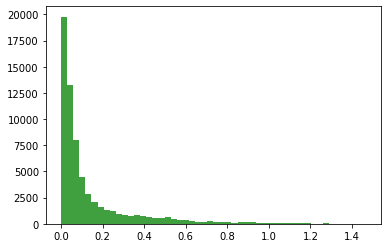

In [41]:
n, bins, patches = plt.hist(x, 50, facecolor='g', alpha=0.75)
#plt.ylim(0,30)

In [87]:
0.16/0.107*0.96


1.435514018691589

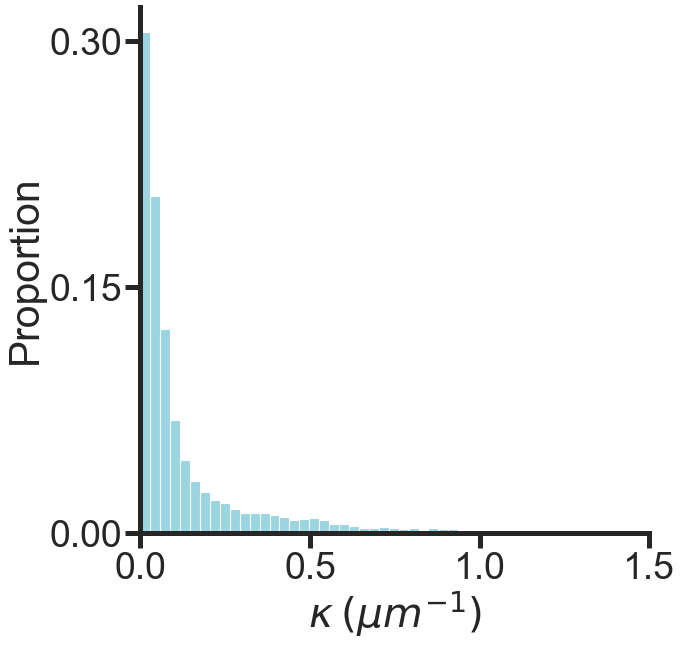

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10.5,10))
sns.histplot(data, x='Point Curvature (um-1)', stat='probability',bins=50, color='#7BC8D9')
#n, bins, patches = plt.hist(x, 50, density = True, facecolor='#7BC8D9')

ax.set_ylabel('Proportion')
ax.set_xlabel( r'$\kappa \: (\mu m ^{-1})$')
ax.set_xlim(0,1.5)
plt.yticks([0,0.15,0.3])

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

plt.savefig(path/('histogram_curves'+date_today+'.svg'))